In [1]:
# import dependencies
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import mean_absolute_error

In [2]:
# load in our data file
temp_df= pd.read_excel("Water_data_years5.xlsx", header=0)

In [3]:
temp_df

,state,statecode,county,countycode,fips,year,tp-totpop,ps-gwpop,ps-swpop,ps-topop,...,to-swsal,to-swtot,to-frtot,to-satot,to-total,to-cufr,to-cusal,to-cuse,to-convy,ls-total
0,AZ,4,Apache County,1,4001.000000,2015,71.474,48.854,0.000,48.854000,...,49.703845,259.12334,310.641239,51.457206,362.098445,161.86813,1.308718,163.176849,36.064223,1.894958
1,AZ,4,Cochise County,3,4003.000000,2015,126.427,102.627,0.000,102.627000,...,49.703845,259.12334,310.641239,51.457206,362.098445,161.86813,1.308718,163.176849,36.064223,1.894958
2,AZ,4,Coconino County,5,4005.000000,2015,139.097,103.701,23.336,127.037000,...,49.703845,259.12334,310.641239,51.457206,362.098445,161.86813,1.308718,163.176849,36.064223,1.894958
3,AZ,4,Gila County,7,4007.000000,2015,53.159,44.404,0.055,44.459000,...,49.703845,259.12334,310.641239,51.457206,362.098445,161.86813,1.308718,163.176849,36.064223,1.894958
4,AZ,4,Graham County,9,4009.000000,2015,37.666,30.656,0.000,30.656000,...,49.703845,259.12334,310.641239,51.457206,362.098445,161.86813,1.308718,163.176849,36.064223,1.894958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1664,WY,56,Weston County,45,56045.000000,2005,6.671,4.555,0.000,4.555000,...,49.703845,259.12334,310.641239,51.457206,362.098445,161.86813,1.308718,163.176849,36.064223,1.894958
1665,WY,56,Weston County,45,56045.000000,2000,6.640,NaN,NaN,5.320000,...,49.703845,259.12334,310.641239,51.457206,362.098445,161.86813,1.308718,163.176849,36.064223,1.894958
1666,WY,56,Weston County,45,22352.630366,1995,6.510,4.840,0.000,4.840000,...,49.703845,259.12334,310.641239,51.457206,362.098445,161.86813,1.308718,163.176849,36.064223,1.894958
1667,WY,56,Weston County,45,22352.630366,1990,0.470,3.980,NaN,199.816678,...,0.000000,7.06000,11.940000,0.260000,12.200000,3.74000,0.000000,3.740000,2.230000,1.894958


In [4]:
# filling in null values
temp_df = temp_df.fillna(value=0)

In [5]:
# checking correlation of columns to tp-totpop - total population of the county in thousands
m = temp_df.corr()["tp-totpop"]

In [6]:
m

statecode    -0.161539
countycode    0.008738
fips         -0.153363
year          0.081215
tp-totpop     1.000000
                ...   
to-cufr       0.047482
to-cusal      0.038683
to-cuse       0.048154
to-convy      0.001537
ls-total      0.022282
Name: tp-totpop, Length: 406, dtype: float64

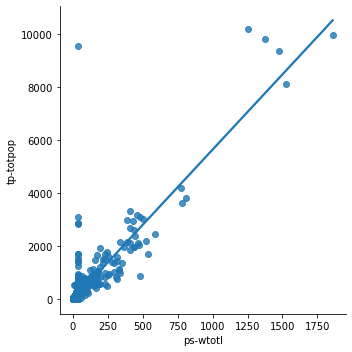

In [7]:
# visualizing how ps-wtotl(Public Supply - Total withdrawals in million gallons/day)
sns.lmplot(x="ps-wtotl", y="tp-totpop", data= temp_df, fit_reg= True, ci= None )

<AxesSubplot:ylabel='Frequency'>

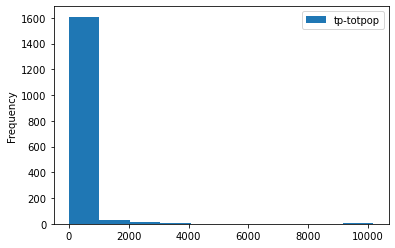

In [8]:
# analyzing our spread of total population in each county
temp_df.plot.hist(y="tp-totpop")

In [9]:
# split train to take in the data for years before 2010 and test data to years after
train = temp_df[temp_df["year"] < 2010].copy()
test = temp_df[temp_df["year"] >= 2010].copy()

In [10]:
# initialize model
model = LinearRegression()

In [11]:
# set up X and y for ML
predictors = ["ps-wtotl" ]
target = ['tp-totpop']

In [12]:
model.fit(train[predictors], train[target])

LinearRegression()

In [13]:
# predict using test dataset
predictions = model.predict(test[predictors])

In [14]:
# adding predictions as a column to the test df
test["predictions"]= predictions

# Changing negative prediction values to 0
test.loc[test["predictions"] <0,"predictions"] =0

test

,state,statecode,county,countycode,fips,year,tp-totpop,ps-gwpop,ps-swpop,ps-topop,...,to-swtot,to-frtot,to-satot,to-total,to-cufr,to-cusal,to-cuse,to-convy,ls-total,predictions
0,AZ,4,Apache County,1,4001.0,2015,71.474,48.854,0.000,48.854,...,259.12334,310.641239,51.457206,362.098445,161.86813,1.308718,163.176849,36.064223,1.894958,0.000000
1,AZ,4,Cochise County,3,4003.0,2015,126.427,102.627,0.000,102.627,...,259.12334,310.641239,51.457206,362.098445,161.86813,1.308718,163.176849,36.064223,1.894958,44.096561
2,AZ,4,Coconino County,5,4005.0,2015,139.097,103.701,23.336,127.037,...,259.12334,310.641239,51.457206,362.098445,161.86813,1.308718,163.176849,36.064223,1.894958,63.511115
3,AZ,4,Gila County,7,4007.0,2015,53.159,44.404,0.055,44.459,...,259.12334,310.641239,51.457206,362.098445,161.86813,1.308718,163.176849,36.064223,1.894958,0.000000
4,AZ,4,Graham County,9,4009.0,2015,37.666,30.656,0.000,30.656,...,259.12334,310.641239,51.457206,362.098445,161.86813,1.308718,163.176849,36.064223,1.894958,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1649,WY,56,Uinta County,41,56041.0,2010,21.118,1.408,14.800,16.208,...,259.12334,310.641239,51.457206,362.098445,161.86813,1.308718,163.176849,36.064223,1.894958,0.000000
1655,WY,56,Washakie County,43,56043.0,2015,8.328,7.012,0.000,7.012,...,259.12334,310.641239,51.457206,362.098445,161.86813,1.308718,163.176849,36.064223,1.894958,0.000000
1656,WY,56,Washakie County,43,56043.0,2010,8.533,5.791,0.000,5.791,...,259.12334,310.641239,51.457206,362.098445,161.86813,1.308718,163.176849,36.064223,1.894958,0.000000
1662,WY,56,Weston County,45,56045.0,2015,7.234,5.283,0.046,5.329,...,259.12334,310.641239,51.457206,362.098445,161.86813,1.308718,163.176849,36.064223,1.894958,0.000000


In [15]:
# calculate mean absolute error
error = mean_absolute_error(test["tp-totpop"],test["predictions"])

In [16]:
# look at descriptives of the total population
temp_df.describe()["tp-totpop"]

count     1669.000000
mean       182.327911
std        692.332495
min          0.000000
25%          4.814000
50%         18.680000
75%         78.930000
max      10170.292000
Name: tp-totpop, dtype: float64

In [17]:
# calculate error between predictions and actual
errors = (test["tp-totpop"]-test["predictions"]).abs()
errors

0       71.474000
1       82.330439
2       75.585885
3       53.159000
4       37.666000
          ...    
1649    21.118000
1655     8.328000
1656     8.533000
1662     7.234000
1663     7.208000
Length: 478, dtype: float64

In [18]:
# visualizing errors by state
error_by_state= errors.groupby(test["state"]).mean()
error_by_state

state
AZ     78.232061
CA    207.663582
CO     41.512594
NM     38.951219
NV     31.707860
UT     53.337097
WY     21.599108
dtype: float64

In [19]:
# average total population by state
average_by_state = test["tp-totpop"].groupby(test["state"]).mean()
average_by_state

state
AZ    440.679933
CA    658.610121
CO     81.920078
NM     62.792242
NV    164.452824
UT     99.306966
WY     24.994196
Name: tp-totpop, dtype: float64

In [20]:
# calculate error ratio to determine how well the model works
error_ratio = error_by_state/average_by_state
error_ratio

state
AZ    0.177526
CA    0.315306
CO    0.506745
NM    0.620319
NV    0.192808
UT    0.537093
WY    0.864165
dtype: float64